In [3]:
from qiskit import *
import numpy as np
from qiskit import IBMQ

token='a2afa69f70955de3c84068e58c44bd81e01740c07ff40db7e9ab824c0da8b9412da7a86e9c453f7f97ecc35fc9f09948ce053cbd9e8213b98feadba15dcc467f'
#IBMQ.enable_account(token)
IBMQ.save_account(token,overwrite=True)
IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q-ornl',group='ornl',project='csc517')
#backend = provider.get_backend('ibm_hanoi')
#backend_config = backend.configuration()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

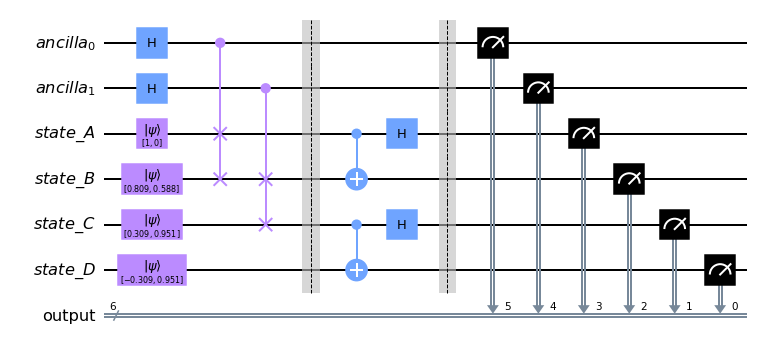

In [52]:

ancilla = QuantumRegister(2,'ancilla')
A = QuantumRegister(1,'state_A')
B = QuantumRegister(1,'state_B')
C = QuantumRegister(1,'state_C')
D = QuantumRegister(1,'state_D')
Meas = ClassicalRegister(6,'output')

circuit = QuantumCircuit(ancilla, A, B, C, D, Meas)
#circuit = QuantumCircuit(ancilla, A, B, C, D)

angle = 0.4*np.pi
for i in range(0,4):
    circuit.initialize([np.cos(i*angle/2),np.sin(i*angle/2)],i+2)

circuit.h(0)
circuit.h(1)

circuit.cswap(0,2,3)
circuit.cswap(1,3,4)

#correcting swap and final gates needed for Bell measurement
circuit.barrier()
circuit.cx(2,3)
circuit.cx(4,5)
circuit.h(2)
circuit.h(4)

circuit.barrier()

#circuit.measure_all()
for i in range(0,6):
    circuit.measure(i,5-i)

circuit.draw(output='mpl')

In [56]:
simulator = Aer.get_backend('qasm_simulator')
shots = 10000
job = execute(circuit,simulator,shots=shots)

result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'111111': 163, '001010': 386, '110110': 48, '101010': 410, '010101': 199, '110011': 371, '000100': 124, '101111': 70, '110001': 385, '000110': 215, '001000': 249, '110010': 38, '101110': 214, '011111': 486, '101011': 136, '000010': 425, '110101': 525, '110111': 532, '000000': 283, '111110': 13, '100010': 396, '001011': 138, '010111': 508, '101100': 130, '000011': 139, '110100': 62, '111100': 17, '100100': 152, '011101': 202, '100000': 267, '001100': 155, '111101': 192, '100011': 168, '010001': 16, '010110': 381, '010100': 66, '001110': 186, '111011': 64, '101000': 287, '111010': 9, '001111': 73, '100110': 226, '111001': 54, '100111': 62, '011110': 397, '110000': 36, '000111': 74, '010010': 36, '010011': 48, '011100': 64, '010000': 3, '011010': 31, '011011': 55, '011001': 22, '011000': 9, '111000': 3}


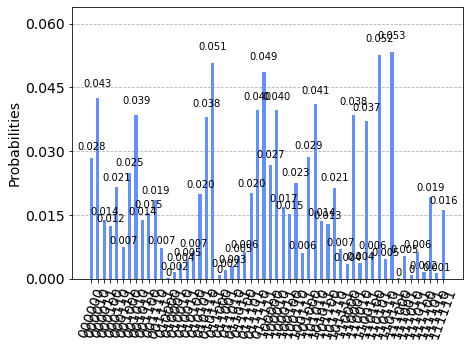

In [57]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [58]:
r12 = 1-8*(counts.get('101100',0)+counts.get('101101',0)+counts.get('101110',0)+counts.get('101111',0))/shots
print(f"r_12 = {r12}")
r23 = 1-8*(counts.get('111100',0)+counts.get('111101',0)+counts.get('111110',0)+counts.get('111111',0))/shots
print(f"r_23 = {r23}")
r34 = 1-8*(counts.get('100011',0)+counts.get('100111',0)+counts.get('101011',0)+counts.get('101111',0))/shots
print(f"r_34 = {r34}")
r14 = 1-8*(counts.get('110011',0)+counts.get('110111',0)+counts.get('111011',0)+counts.get('111111',0))/shots
print(f"r_14 = {r14}")

inequality = r12 + r23 + r34 - r14

print(f"r_12 + r_23 + r_34 - r_14 = {inequality}")


r_12 = 0.6688000000000001
r_23 = 0.692
r_34 = 0.6512
r_14 = 0.09599999999999997
r_12 + r_23 + r_34 - r_14 = 1.916
